In [1]:
import numpy as np
import h5py
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#Lab 0 
#generate a synthetic pulse
A = 1
trise = 50e-9
tfall = 50e-6
tpulse = 100e-6
tstart = 0
tend = 500e-6
nsamples = 1e5
spc = (tend-tstart)/nsamples
synsamples = np.arange(tstart, tend,spc)
out = np.zeros((np.shape(synsamples)[0],2))

for i in range(0,np.shape(synsamples)[0]):
    if synsamples[i]>tstart:
        out[i] = synsamples[i]
    
    

/home/jake/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
pulsedata = h5py.File('/home/jake/Downloads/DATA2.h5', 'r')
#pulsedata['EventData']
#Digitized signal traces
data = pulsedata['RawData']
printcounter = 0
d1 = np.zeros(np.shape(data))
for n in range(0,data.shape[0]):
    d1[n,:] = data[n]
    if (printcounter == 100):
        print(n)
        printcounter = 0
    ...
    printcounter += 1

#Define gaussian function
def gaus(x, a, b, c):
    return a * np.exp(-(x-b)**2/(2*c**2))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500


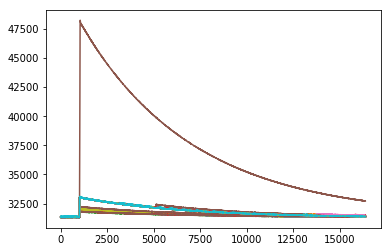

In [3]:
#Plot some data to get a feel for it
fig, ax = plt.subplots()
for l in range(0,100):
    ax.plot(d1[l,:])


#generate some fake data to see how well the fit works
A = 1700;
mu = 1/5500;
x = np.arange(0,15000,1)
dtime = 1000;
zero = 31350
delay = dtime*np.ones_like(x);
y = A*np.exp(-mu*(x-delay)) + zero*np.ones_like(x)
for n in range (0,x.shape[0]):
    if(x[n] < dtime):
        y[n] = zero
        
#Plot fake data over real
#ax.plot(y)
#plt.show()


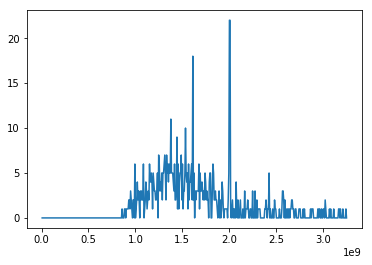

In [107]:
hts3 = np.max(s3, axis=1)
n3, edges3 = np.histogram(hts3, bins=500, range = (0,.05*np.max(hts)))
    #Find first nonzero element, set as first channel to read --highly optional
nz = np.nonzero(n)
bins = edges3[1:]
plt.plot(bins,n3)
#plt.loglog(bins[100:],n3[100:])

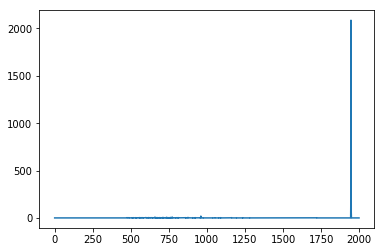

In [68]:
 n, edges = np.histogram(hts, bins=2000, range = (0,1.1*np.mean(hts)))
plt.plot(n)

In [87]:
nz[0][0]

1396

In [89]:
from numba import jit
@jit (parallel=True)

def TrapFilter(v2_data, l, k, M):   
    d2 = np.zeros_like(v2_data)
    p2 = np.zeros_like(v2_data)
    s2 = np.zeros_like(v2_data)
    nstart2 = k+l+1
    for n in range(nstart2,v2_data.shape[0]):
        d2[:,n] = v2_data[:,n] -v2_data[:,n-k] - v2_data[:,n-l] +v2_data[:,n-k-l]
        p2[:,n] = p2[:,n-1] +d2[:,n]
        s2[:,n] = s2[:,n-1] +p2[:,n] +d2[:,n]*M
    return s2
###################################################

#Create loop in which to encapsulate the system
lvals = np.arange(120,1200,50)
itmax = 8
#zoids = np.zeros((d1.shape[0],(d1.shape[1]+1000),itmax))
reg = 25
fit_values = np.zeros((itmax,4))
fit_qual = np.zeros((3,3,itmax))
vals = np.zeros((itmax,2*reg))

for r in range(0,itmax):
    #l is length of convolution function
    l = lvals[r]
    print(r, 'is r')
    #Create loop
    #k is rise time of trapezoid
    #Set m; gap time
    m = 30
    #define k (which is the input I am using in this formulation)
    k = l-m #2*l+1
    #duration of flat top is m = l-k
    #n is sample number, v(n) is the sample
    #M is decay constant of sampled exp signal
    pad2 = np.zeros((1000,d1.shape[0]))
    #########################
    #set up loop
    #pulses = np.zeros((d1.shape[0],(d1.shape[1]+1000)))
    #print('here')
    #for y in range(0,100):
    #Define data, perform baseline correction
    v2 = d1[:,:]
    offset = np.mean(v2[:,0:900])
    v2_basecorr = v2-offset*np.ones_like(v2)

    #Clip negatives --actually not needed
    #v_basecorr = v_basecorr.clip(min=0)

    #Pad data with zeros
    v2_data = np.hstack((pad2.T,v2_basecorr))

    #Determine value for M
    #T = 
    #tau = mu
    #M = 1/(np.exp((1/mu))-1)
    M = (1/mu) + .5
    
    #Loop through trap filter
    s2 = TrapFilter(v2_data,k,l,M)
    #Write trapezoids to zoids
    #zoids[:,:,r] = s2

    #Here's some plotting for debugging purposes
    #fig, ax = plt.subplots()
    #ax.plot(s[1500:5500])
    #plt.show()


    #Use numpy's max function to create list of pulse heights
    #define slice of data to use
    s3 = s2

    hts = np.max(s3, axis=1)
    n, edges = np.histogram(hts, bins=20000, range = (0,1.1*np.mean(hts)))
    nz = np.nonzero(n)
    #plt.show()

    #Find first nonzero element, set as first channel to read --highly optional
    #nz = np.nonzero(n)
    #plt.loglog(bins[nz[0][0]:bins.shape[0]-1],n[nz[0][0]:])
    #plt.show()

    #Find max, plot around it, automatically find FWHM
    loc = np.argmax(n)

    #Throw in some plotting for debugging purposes
    #plt.plot(edges[1:],n)

    #Create a fit to the data using code from the first lab
    #define data range
    x = edges[loc-reg:loc+reg] 
    y = n[loc-reg:loc+reg]

    xtest= np.arange(0,2*reg,1)

    ###xtest = arange
    #plt.scatter(xtest,y)
    h_guess = np.max(y)
    popt, pcov = curve_fit(gaus, xtest, y, bounds=(0, [h_guess, 25, 15]))
    fit_values[r,0:3] = popt
    fit_values[r,3] = popt[1]+(loc-nz[0][0])
    fit_qual[:,:,r] = pcov
    
    vals[r,:] = y
    print(r)
    
    #Plot the fit and check
    ytest = gaus(xtest,popt[0],popt[1],popt[2])
    #plt.scatter(xtest,ytest)
    
plt.show()


0 is r
0
1 is r
1
2 is r
2
3 is r
3
4 is r
4
5 is r
5
6 is r
6
7 is r
7


[0.00116224 0.00092751 0.00079992 0.00079018 0.00074562 0.00074178
 0.00076834 0.00079358]


Text(0,0.5,'Counts per energy bin')

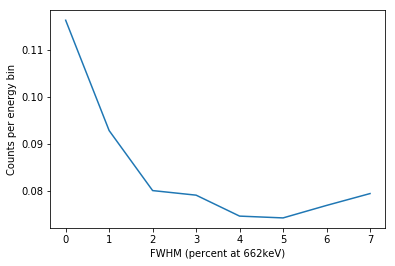

In [90]:
#calculate FWHM
pk = fit_values[:,3] 
wd = fit_values[:,2]
FWHM = 2.35*wd/pk
print(FWHM)
plt.plot(100*FWHM)
plt.xlabel('FWHM (percent at 662keV)')
plt.ylabel('Counts per energy bin')



In [62]:
fit_values

array([[186.39510561,  23.81595173,   8.36725252],
       [232.48586388,  25.        ,   6.67144104],
       [268.84846879,  24.20933032,   5.75064907]])

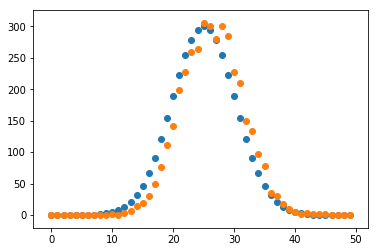

In [91]:
plt.scatter(xtest,ytest)
plt.scatter(xtest,y)

In [21]:
60*16+200

1160

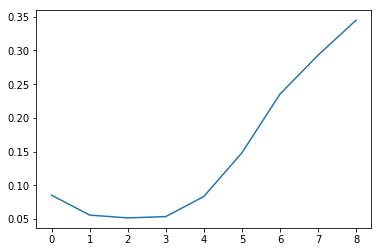

In [11]:

#[0.08525841 0.05578018 0.05160413 0.05355871 0.08343804 0.14817189]
#200 300 400 500 600 700 800 900 1000
FWHM2 = np.array([8.52584082e-02, 5.57801777e-02, 0.05160413, 0.05355871, 0.08343804, 0.14817189, 0.23520664, 0.29291333, 0.34487316])

plt.plot(FWHM2)

In [8]:
 d2 = np.zeros_like(v2_data)
    p2 = np.zeros_like(v2_data)
    s2 = np.zeros_like(v2_data)
    nstart2 = k+l+1
    for n in range(nstart2,v2_data.shape[0]):
        d2[:,n] = v2_data[:,n] -v2_data[:,n-k] - v2_data[:,n-l] +v2_data[:,n-k-l]
        p2[:,n] = p2[:,n-1] +d2[:,n]
        s2[:,n] = s2[:,n-1] +p2[:,n] +d2[:,n]*M
    zoids[:,:,r] = s2


array([0.08525841, 0.05578018, 0.05160413])

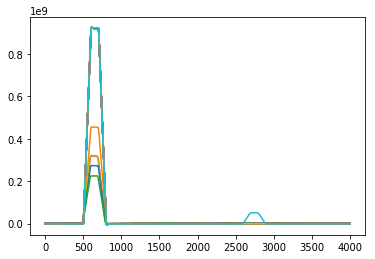

In [37]:
fig, ax = plt.subplots()
for i in range(0,40):
    ax.plot(s2[i,1500:5500])
plt.show()

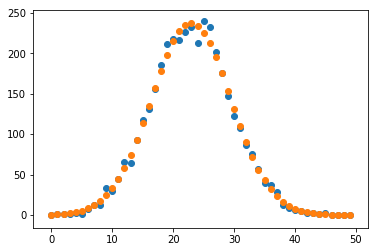

In [124]:
#Use numpy's max function to create list of pulse heights
hts = np.max(s2, axis=1)
n, edges = np.histogram(hts, bins=2000, range = (np.mean(hts),1.1*np.mean(hts)))
#plt.show()

#Find first nonzero element, set as first channel to read --highly optional
#nz = np.nonzero(n)
#plt.loglog(bins[nz[0][0]:bins.shape[0]-1],n[nz[0][0]:])
#plt.show()

#Find max, plot around it, automatically find FWHM
loc = np.argmax(n)
reg = 25

#Throw in some plotting for debugging purposes
#plt.plot(edges[1:],n)

#Create a fit to the data using code from the first lab
from scipy.optimize import curve_fit
#define data range
x = edges[loc-reg:loc+reg] 
y = n[loc-reg:loc+reg]

xtest= np.arange(0,2*reg,1)

###xtest = arange
plt.scatter(xtest,y)
popt, pcov = curve_fit(gaus, xtest, y, bounds=(0, [2000., 25, 15]))

#Plot the fit and check
ytest = gaus(xtest,popt[0],popt[1],popt[2])
plt.scatter(xtest,ytest)


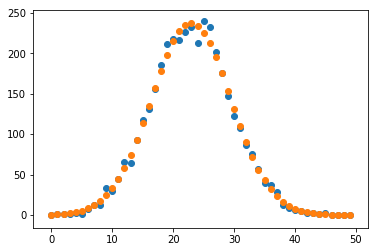

In [123]:
#Create a fit to the data using code from the first lab
from scipy.optimize import curve_fit
#define data range
x = edges[loc-reg:loc+reg] 
y = n[loc-reg:loc+reg]

xtest= np.arange(0,2*reg,1)

###xtest = arange
plt.scatter(xtest,y)
popt, pcov = curve_fit(gaus, xtest, y, bounds=(0, [2000., 25, 15]))

#Plot the fit and check
ytest = gaus(xtest,popt[0],popt[1],popt[2])
plt.scatter(xtest,ytest)


In [ ]:
from numba import jit
@jit (parallel=True)

def TrapFilter(v2_data, l, k, M):   
    d2 = np.zeros_like(v2_data)
    p2 = np.zeros_like(v2_data)
    s2 = np.zeros_like(v2_data)
    nstart2 = k+l+1
    for n in range(nstart2,v2_data.shape[0]):
        d2[:,n] = v2_data[:,n] -v2_data[:,n-k] - v2_data[:,n-l] +v2_data[:,n-k-l]
        p2[:,n] = p2[:,n-1] +d2[:,n]
        s2[:,n] = s2[:,n-1] +p2[:,n] +d2[:,n]*M
    return s2
###################################################

#Create loop in which to encapsulate the system
lvals = np.arange(500,1200,100)
itmax = 4
zoids = np.zeros((d1.shape[0],(d1.shape[1]+1000),itmax))
reg = 25
fit_values = np.zeros((itmax,3))
fit_qual = np.zeros((3,3,itmax))
vals = np.zeros((itmax,2*reg))

for r in range(0,itmax):
    #l is length of convolution function
    l = lvals[r]
    print(r, 'is r')
    #Create loop
    #k is rise time of trapezoid
    #Set m; gap time
    m = 10
    #define k (which is the input I am using in this formulation)
    k = l-m #2*l+1
    #duration of flat top is m = l-k
    #n is sample number, v(n) is the sample
    #M is decay constant of sampled exp signal
    pad2 = np.zeros((1000,d1.shape[0]))
    #########################
    #set up loop
    #pulses = np.zeros((d1.shape[0],(d1.shape[1]+1000)))

    #for y in range(0,100):
    #Define data, perform baseline correction
    v2 = d1[:,:]
    offset = np.mean(v2[:,0:900])
    v2_basecorr = v2-offset*np.ones_like(v2)

    #Clip negatives --actually not needed
    #v_basecorr = v_basecorr.clip(min=0)

    #Pad data with zeros
    v2_data = np.hstack((pad2.T,v2_basecorr))

    #Determine value for M
    #T = 
    #tau = mu
    #M = 1/(np.exp((1/mu))-1)
    M = (1/mu) + .5
    #Loop through trap filter
    s2 = TrapFilter(v2_data,k,l,M)
    #Write trapezoids to zoids
    zoids[:,:,r] = s2

#ZOIDS now contains all of the trapezoids needed to make the spectra. Now set up separate loop to find,
#fit and evaluate peaks

#Here's some plotting for debugging purposes
#fig, ax = plt.subplots()
#ax.plot(s[1500:5500])
#plt.show()


########Loop for finding and fitting##########################################
#Use numpy's max function to create list of pulse heights

#initialize array to hold fit data
reg = 25
fit_values = np.zeros((itmax,3))
fit_qual = np.zeros((3,3,itmax))
vals = np.zeros((itmax,2*reg))


    #define slice of data to use
    s3 = zoids[:,:,u]

    hts = np.max(s3, axis=1)
    n, edges = np.histogram(hts, bins=2000, range = (np.mean(hts),1.1*np.mean(hts)))
    #plt.show()

    #Find first nonzero element, set as first channel to read --highly optional
    #nz = np.nonzero(n)
    #plt.loglog(bins[nz[0][0]:bins.shape[0]-1],n[nz[0][0]:])
    #plt.show()

    #Find max, plot around it, automatically find FWHM
    loc = np.argmax(n)

    #Throw in some plotting for debugging purposes
    #plt.plot(edges[1:],n)

    #Create a fit to the data using code from the first lab
    #define data range
    x = edges[loc-reg:loc+reg] 
    y = n[loc-reg:loc+reg]

    xtest= np.arange(0,2*reg,1)

    ###xtest = arange
    #plt.scatter(xtest,y)
    h_guess = np.max(y)
    popt, pcov = curve_fit(gaus, xtest, y, bounds=(0, [h_guess, 25, 15]))
    fit_values[u,:] = popt
    fit_qual[:,:,u] = pcov
    
    vals[u,:] = y
    print(u)
    
    #Plot the fit and check
    ytest = gaus(xtest,popt[0],popt[1],popt[2])
    #plt.scatter(xtest,ytest)
    
plt.show()


In [58]:
pcov

array([[ 4.11396361e+01, -2.30722004e-08, -3.53016563e-02],
       [-2.30722004e-08,  9.08760780e-05,  6.66976136e-11],
       [-3.53016563e-02,  6.66976136e-11,  9.08762513e-05]])

In [54]:
ytest

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.66361910e-290,
       2.14272421e-194, 1.65537824e-117, 7.67090843e-060, 2.13213619e-021,
       3.55468953e-002, 3.55473308e-002, 2.13221456e-021, 7.67137833e-060,
       1.65552021e-117, 2.14296047e-194, 1.66384330e-290, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

In [116]:
#l is length of convolution function
l = 600
#k is rise time of trapezoid
k = 400 #2*l+1
#duration of flat top is m = l-k
#n is sample number, v(n) is the sample
#M is decay constant of sampled exp signal
pad = np.zeros((1000))
#########################
#set up loop
pulses = np.zeros((d1.shape[0],(d1.shape[1]+1000)))

for y in range(0,100):
    #Define data, perform baseline correction
    v = d1[y,:]
    offset = np.mean(d1[y,0:900])
    v_basecorr = v-offset*np.ones_like(v)

    #Clip negatives --actually not needed
    #v_basecorr = v_basecorr.clip(min=0)

    #Pad data with zeros
    v_data = np.hstack((pad,v_basecorr))

    #Determine value for M
    #T = 
    #tau = mu
    #M = 1/(np.exp((1/mu))-1)
    M = (1/mu) + .5
    #Loop through trap filter
    d = np.zeros_like(v_data)
    p = np.zeros_like(v_data)
    s = np.zeros_like(v_data)
    nstart = k+l+1
    for n in range(nstart,v_data.shape[0]):
        d[n] = v_data[n] -v_data[n-k] - v_data[n-l] +v_data[n-k-l]
        p[n] = p[n-1] +d[n]
        s[n] = s[n-1] +p[n] +d[n]*M
    pulses[y,:] = s


#p(n) = p(n-1) + v(n) -v(n-l)
#all together now
#initiate p,dkl and s as all zeros
#
#fig, ax = plt.subplots()
#ax.plot(s[1500:5500])
#plt.show()

In [47]:
xtest.shape

(50,)

In [29]:
gaus(x, popt[0],popt[1],popt[2])

array([77.96423441, 77.94925213, 77.93426926, 77.9192858 , 77.90430174,
       77.88931709, 77.87433186, 77.85934603, 77.84435962, 77.82937263,
       77.81438505, 77.7993969 , 77.78440816, 77.76941884, 77.75442895,
       77.73943848, 77.72444743, 77.70945581, 77.69446362, 77.67947086,
       77.66447754, 77.64948364, 77.63448918, 77.61949416, 77.60449857,
       77.58950242, 77.57450571, 77.55950844, 77.54451062, 77.52951224,
       77.5145133 , 77.49951382, 77.48451378, 77.46951319, 77.45451205,
       77.43951037, 77.42450814, 77.40950537, 77.39450205, 77.3794982 ,
       77.3644938 , 77.34948887, 77.33448339, 77.31947739, 77.30447085,
       77.28946377, 77.27445617, 77.25944803, 77.24443937, 77.22943018])

In [24]:
x

array([1.82096e+09, 1.82134e+09, 1.82172e+09, 1.82210e+09, 1.82248e+09,
       1.82286e+09, 1.82324e+09, 1.82362e+09, 1.82400e+09, 1.82438e+09,
       1.82476e+09, 1.82514e+09, 1.82552e+09, 1.82590e+09, 1.82628e+09,
       1.82666e+09, 1.82704e+09, 1.82742e+09, 1.82780e+09, 1.82818e+09,
       1.82856e+09, 1.82894e+09, 1.82932e+09, 1.82970e+09, 1.83008e+09,
       1.83046e+09, 1.83084e+09, 1.83122e+09, 1.83160e+09, 1.83198e+09,
       1.83236e+09, 1.83274e+09, 1.83312e+09, 1.83350e+09, 1.83388e+09,
       1.83426e+09, 1.83464e+09, 1.83502e+09, 1.83540e+09, 1.83578e+09,
       1.83616e+09, 1.83654e+09, 1.83692e+09, 1.83730e+09, 1.83768e+09,
       1.83806e+09, 1.83844e+09, 1.83882e+09, 1.83920e+09, 1.83958e+09])

In [38]:
qq = np.hstack((pad2.T,v2_basecorr))

In [39]:
qq.shape

(4616, 17384)

In [40]:
qq[1,:]

array([ 0.        ,  0.        ,  0.        , ..., 41.01890141,
       41.01890141, 39.01890141])